In [2]:
import h5py as h5
import numpy as np
import os
import matplotlib.pyplot as plt
from tqdm import tqdm
data_path = '/home/rfit/Telescope_Array/phd_work/data/normed/pr_q4_14yr_e1_0110_excl_sat_F_excl_geo_F.h5'

In [3]:
with h5.File(data_path,'r') as f:
    print('keys', list(f.keys()))
    train = f['train']
    print(list(train.keys()))
    print(train['ev_starts'][()])
    print(train['ev_ids'][()])
    print(train['dt_params'])
    
    norm_param = f['norm_param']['dt_params']
    norm_param_std = norm_param['std'][()]
    norm_param_mean = norm_param['mean'][()]
    ev_starts_data = train['ev_starts'][()] 
    dt_params_data = train['dt_params'][()]
    ev_ids_data = train['ev_ids'][()]
    dt_mask = train['dt_mask'][()]

keys ['norm_param', 'test', 'train', 'val']
['dt_bundle', 'dt_mask', 'dt_params', 'ev_ids', 'ev_starts', 'mc_params', 'recos', 'wfs_flat']
[        0        43        73 ... 111191147 111191169 111191190]
[[2.01007100e+07 1.44307856e+05 1.00000000e+00]
 [2.01307080e+07 6.53368413e+04 1.00000000e+00]
 [2.02112110e+07 2.55049578e+04 1.00000000e+00]
 ...
 [2.02112150e+07 5.43070790e+04 1.00000000e+00]
 [2.02008070e+07 2.48500224e+02 1.00000000e+00]
 [2.02004250e+07 1.93619781e+05 1.00000000e+00]]
<HDF5 dataset "dt_params": shape (111191190, 6), type "<f4">


In [4]:
data = []
for idx in tqdm(range(len(ev_starts_data)-1)):
    st = ev_starts_data[idx]
    fn = ev_starts_data[idx + 1]
    data.append(dt_params_data[st:fn])

100%|██████████| 4498159/4498159 [00:03<00:00, 1322357.91it/s]


In [15]:
def drow_statisstic(lenght_info, dt_params_data):
    lenght_info += f'data has {len(dt_params_data)} events'
    f, axis = plt.subplots(2,3, figsize = (10,10))
    names = ['det x', 'det y', 'det z', 'log(signal)', 'flat front', 'log (real - front)']
    for i in tqdm(range(6)):
        col = i%3
        row = i//3
        drow = dt_params_data[:, i]
        if i == 3:
            range_ = None
            drow = np.log(dt_params_data[:, i] - dt_params_data[:, i].min() + 1e-5)
        elif i ==5:
            range_= (-1.5,5)
            range_ = None
#             drow = np.log(dt_params_data[:, i] - dt_params_data[:, i].min() + 1e-5)
        else:
            range_ = (-5,5)
#             range_ = (-9,-8)
        axis[row][col].hist(drow, density = True, bins=100, range = range_)
        axis[row][col].set_title(f'{names[i]}')
    plt.suptitle(lenght_info)
    return f

100%|██████████| 6/6 [00:08<00:00,  1.37s/it]


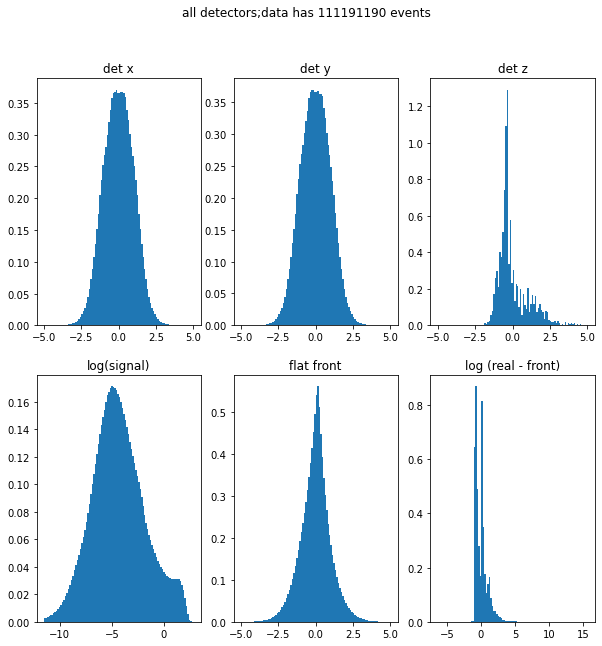

In [16]:
lenght_info = f'all detectors;'
fig = drow_statisstic(lenght_info, dt_params_data)

100%|██████████| 6/6 [00:00<00:00, 10.59it/s]


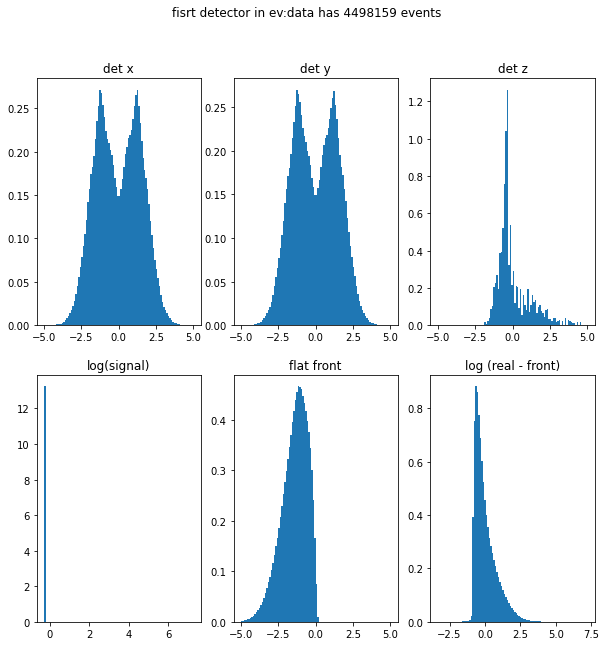

In [7]:
lenght_info = f'fisrt detector in ev:'
fig_fisrt = drow_statisstic(lenght_info, np.array([i[0] for i in data]))

# Статистика для стартового токена

In [8]:
print('signal min', dt_params_data[:,3].min())
print('flat min', dt_params_data[:,4].min())
print('real-flat max', dt_params_data[:,5].max())

signal min -0.277908
flat min -8.798042
real-flat max 15.595449
